In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags, block_diag, eye

In [2]:
# Define grid and parameters
N = 128
h = 1.0 / (N - 1)
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

In [3]:
# Exact solution
u_exact = -(1 / (2 * np.pi**2)) * np.sin(np.pi * X) * np.sin(np.pi * Y)

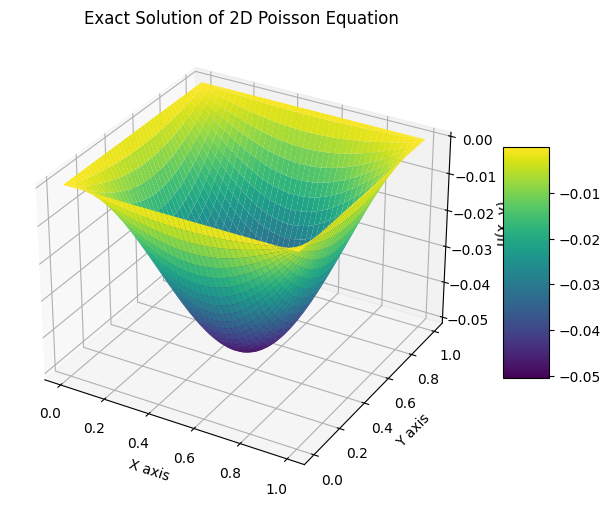

In [4]:
# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('u(x, y)')
ax.set_title('Exact Solution of 2D Poisson Equation')

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [5]:
# Initialize right-hand side (rhs)
rhs = np.sin(np.pi * X) * np.sin(np.pi * Y)
norm_rhs = np.linalg.norm(rhs)
print(norm_rhs)

63.49999999999999


In [6]:
# Function to apply the discrete Laplacian
def apply_laplacian(u):
    laplacian_u = (np.roll(u, -1, axis=0) + np.roll(u, 1, axis=0) + np.roll(u, -1, axis=1) + np.roll(u, 1, axis=1) - 4 * u) / h**2
    laplacian_u[0, :] = laplacian_u[-1, :] = laplacian_u[:, 0] = laplacian_u[:, -1] = 0  # Enforce boundary conditions
    return laplacian_u

In [9]:
# Initialize variables for CG method
u_cg = np.zeros((N, N))  # Initial guess
r = np.copy(rhs)  # Initial residual
p = np.copy(r)  # Initial direction
# x is like u[i,j], u[i+1,j],...,u[i,j+1],...,u[N-1,N-1]
tolerance = 1e-4
itmax = 1500
residual_norms = []


# Solve using the Conjugate Gradient method
b = rhs.ravel()  # Flatten the rhs for use in the CG algorithm

# CG Algorithm
x_k = np.zeros_like(b)  # Initial guess
r_k = b - apply_laplacian(x_k.reshape(N, N)).ravel()  # Initial residual
residual_norms.append(np.linalg.norm(r_k))
if np.linalg.norm(r_k) < tolerance:
    print("Initial guess is sufficient.")
else:
    p_k = r_k
    k = 0
    while True:
        Ap_k = apply_laplacian(p_k.reshape(N, N)).ravel()
        alpha_k = np.dot(r_k, r_k) / np.dot(p_k, Ap_k)
        x_k = x_k + alpha_k * p_k
        r_k_new = r_k - alpha_k * Ap_k
        residual_norms.append(np.linalg.norm(r_k_new))
        if np.linalg.norm(r_k_new) < tolerance:
            break
        beta_k = np.dot(r_k_new, r_k_new) / np.dot(r_k, r_k)
        p_k = r_k_new + beta_k * p_k
        r_k = r_k_new
        k += 1

# Reshape x_k back to 2D for plotting
u_cg = x_k.reshape(N, N)

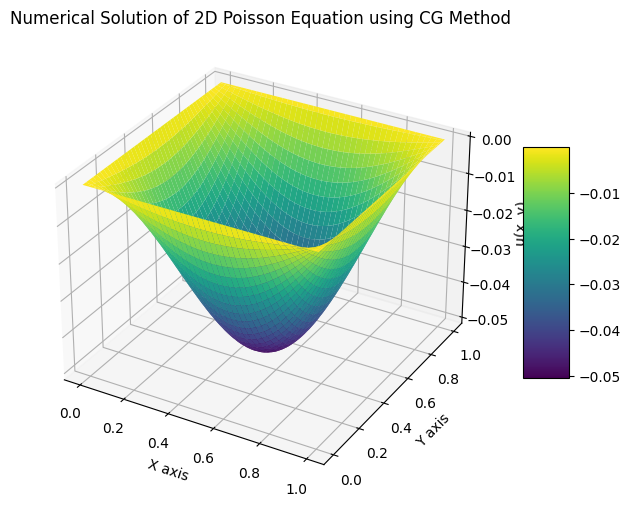

In [10]:
# Plotting the CG solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_cg, cmap='viridis', edgecolor='none')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('u(x, y)')
ax.set_title('Numerical Solution of 2D Poisson Equation using CG Method')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [12]:
relative_real_error = np.linalg.norm(u_exact - u_cg) / np.linalg.norm(u_exact)
print(f'\n The relative real error is {relative_real_error:.5e} \n')


 The relative real error is 5.09946e-05 



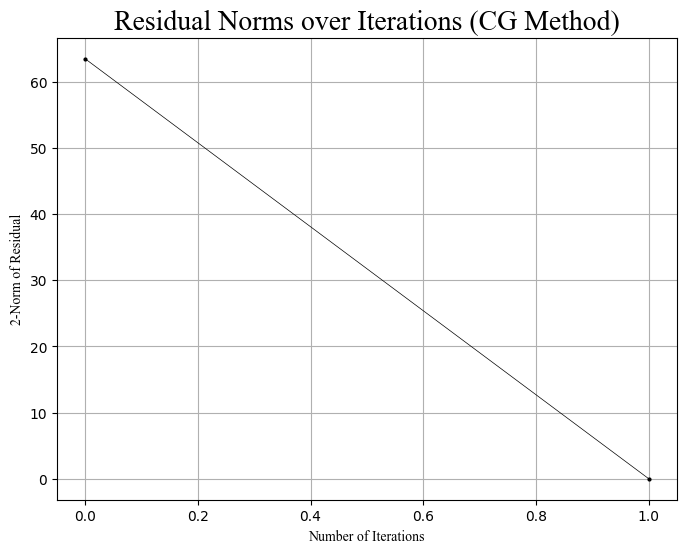

In [11]:
# Plotting the residual norms
plt.figure(figsize=(8, 6))
plt.plot(residual_norms, 'ko-', markersize=2, linewidth=0.5)
plt.xlabel('Number of Iterations', fontname='Times New Roman')
plt.ylabel('2-Norm of Residual', fontname='Times New Roman')
plt.title('Residual Norms over Iterations (CG Method)', fontname='Times New Roman', fontsize=20)
plt.grid(True)
plt.show()